In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/LogoDetection/qmul_toplogo10/

/content/drive/My Drive/LogoDetection/qmul_toplogo10


In [3]:
import os
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [4]:
dir = "masks"
temp = os.path.join(str(dir))

boxes = np.zeros((700, 4))
cnt = 0

for temp_dir_name in sorted(os.listdir(temp)):

    print(temp_dir_name)
    tmp = os.path.join(str(dir) + '/' + str(temp_dir_name))

    for fil in sorted(os.listdir(tmp)):
      f = open(str(dir) + '/' + str(temp_dir_name) + '/' + str(fil), "r")
      
      contents = f.read()

      w1 = int(contents.split()[0])
      h1 = int(contents.split()[1])
      w2 = int(contents.split()[2]) + w1
      h2 = int(contents.split()[3]) + h1

      boxes[cnt][0] = w1
      boxes[cnt][1] = h1
      boxes[cnt][2] = w2
      boxes[cnt][3] = h2

      cnt += 1

print(type(boxes))

adidas0
chanel
gucci
hh
lacoste
mk
nike
prada
puma
supreme
<class 'numpy.ndarray'>


In [5]:
print(boxes)
boxes = np.reshape(boxes, (700, 4))
np.save('boxes', boxes)

[[567. 408. 730. 563.]
 [616.   7. 774. 118.]
 [283.  69. 369. 127.]
 ...
 [159. 226. 425. 339.]
 [293. 163. 368. 189.]
 [153. 160. 466. 267.]]


In [6]:
print(boxes.shape)

(700, 4)


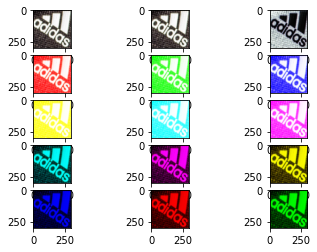

In [7]:
#This cell is meant to experiment with an image to try out different ways to augment it...
#After seeing the results on a few images, the dataset was augmented by creating 13 augmented images from every original image...
"""
  image[: , :, 2] = 255 (or 0) OR image[:, :, 1] = 255 etc...
"""

import cv2
import matplotlib.pyplot as plt
image = cv2.imread("jpg/adidas0/adidas1.jpg")


fig, axis = plt.subplots(5, 3)

box = boxes[0]
box = box.reshape((1,4))
w1 = int(box[0][0])
h1 = int(box[0][1])
w2 = int(box[0][2])
h2 = int(box[0][3])

tmpImg = np.zeros((h2 - h1, w2 - w1, 3))

tmpImg = image[h1:h2, w1:w2, :]

image = cv2.resize(tmpImg, (300, 300), interpolation = cv2.INTER_AREA)
image = image / 255.0

# print(type(image))

image = image.tolist()

# print(im)

# plt.imshow(im)

# axis[0, 0].imshow(image)

# tmpImg = np.zeros((6, 300, 300, 3))

# for i in range(6):
#   for j in range(300):
#     for k in range(300):
#       for l in range(3):
#         x = int(image[j][k][l])
#         tmpImg[i, j, k, l] = float(x)

axis[0,0].imshow(image)

tmpImg = np.array(image)
axis[0,1].imshow(tmpImg)

# print(tmpImg)

tmpImg = np.array(image)
tmpImg = 1 - tmpImg
axis[0,2].imshow(tmpImg)


tmpImg = np.array(image)
tmpImg[:, :, 0] = 1
axis[1,0].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,1] = 1
axis[1,1].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,2] = 1
axis[1,2].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,0] = 1
tmpImg[:,:,1] = 1
axis[2,0].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,1] = 1
tmpImg[:,:,2] = 1
axis[2,1].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,2] = 1
tmpImg[:,:,0] = 1
axis[2,2].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,0] = 0
axis[3,0].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,1] = 0
axis[3,1].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,2] = 0
axis[3,2].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,0] = 0
tmpImg[:,:,1] = 0
axis[4,0].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,1] = 0
tmpImg[:,:,2] = 0
axis[4,1].imshow(tmpImg)

tmpImg = np.array(image)
tmpImg[:,:,2] = 0
tmpImg[:,:,0] = 0
axis[4,2].imshow(tmpImg)

# axis[0,1].imshow(image)

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

labels = np.zeros(9800, dtype = 'uint8')
images = np.zeros((9800,300,300,3), dtype = 'uint8')
cnt = 0

dir = "jpg"
temp = os.path.join(str(dir))

for temp_dir_name in sorted(os.listdir(temp)):

    print(temp_dir_name)
    tmp = os.path.join(str(dir) + '/' + str(temp_dir_name))

    for image in sorted(os.listdir(tmp)):
      if image.endswith(".jpg") or image.endswith(".png"):
        im = cv2.imread(str(dir) + '/' + str(temp_dir_name) + '/' + str(image))

        box = boxes[cnt//14]
        box = box.reshape((1,4))
        w1 = int(box[0][0])
        h1 = int(box[0][1])
        w2 = int(box[0][2])
        h2 = int(box[0][3])

        tmpImg = np.zeros((h2 - h1, w2 - w1, 3))

        tmpImg = im[h1:h2, w1:w2, :]

        tmpImg = cv2.resize(tmpImg, (300, 300), interpolation = cv2.INTER_AREA)
        # tmpImg = tmpImg / 255.0
        tmpImg = tmpImg.tolist()

        im = np.array(tmpImg)
        images[cnt] = im
        cnt = cnt + 1

        im = 255.0 - im
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 0] = 255.0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 1] = 255.0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 2] = 255.0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 0] = 255.0
        im[:, :, 1] = 255.0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 1] = 255.0
        im[:, :, 2] = 255.0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 2] = 255.0
        im[:, :, 0] = 255.0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 0] = 0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 1] = 0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 2] = 0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 0] = 0
        im[:, :, 1] = 0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 1] = 0
        im[:, :, 2] = 0
        images[cnt] = im
        cnt = cnt + 1

        im = np.array(tmpImg)
        im[:, :, 2] = 0
        im[:, :, 0] = 0
        images[cnt] = im
        cnt = cnt + 1

        if(cnt % 196 == 0):
          print(cnt)

print(cnt)

adidas0
196
392
588
784
980
chanel
1176
1372
1568
1764
1960
gucci
2156
2352
2548
2744
2940
hh
3136
3332
3528
3724
3920
lacoste
4116
4312
4508
4704
4900
mk
5096
5292
5488
5684
5880
nike
6076
6272
6468
6664
6860
prada
7056
7252
7448
7644
7840
puma
8036
8232
8428
8624
8820
supreme
9016
9212
9408
9604
9800
9800


In [0]:
target_labels = np.zeros((9800,10))
lbl = -1
for i in range(0,9800):
  if i%980 == 0:
    lbl = lbl + 1
  target_labels[i][lbl] = 1
  

In [0]:
from sklearn.utils import shuffle
# final_images, final_labels = shuffle(images, target_labels)
final_images, final_labels = images, target_labels

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(final_images, final_labels, test_size = 0.2, shuffle = True)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, shuffle = True)

In [25]:
import keras
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
from keras.models import Sequential

cnn_model_1 = Sequential()

cnn_model_1.add(Conv2D (kernel_size = (3,3), filters = 16, input_shape = X_train.shape[1:], activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size = 2))

cnn_model_1.add(Conv2D(kernel_size = (3,3), filters = 32, activation='relu'))
cnn_model_1.add(Dropout(0.4))
cnn_model_1.add(MaxPooling2D(pool_size = 2))
 
cnn_model_1.add(Conv2D(kernel_size = (5,5), filters = 64, activation='relu'))
cnn_model_1.add(Dropout(0.2))
cnn_model_1.add(MaxPooling2D(pool_size = 2))

cnn_model_1.add(Conv2D(kernel_size = (5, 5), filters = 128, activation='relu'))
# cnn_model.add(Dropout(0.1))
cnn_model_1.add(MaxPooling2D(pool_size = 2))

cnn_model_1.add(GlobalAveragePooling2D())

cnn_model_1.add(Dense(10, activation = 'softmax'))

cnn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
dropout_4 (Dropout)          (None, 69, 69, 64)       

In [0]:
#Compile the model 
from keras.optimizers import adam

myopt = adam( lr = 0.0001, decay = 1e-7)

cnn_model_1.compile(optimizer = myopt, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [62]:
H = cnn_model_1.fit(X_train, Y_train, epochs = 10, verbose=1, batch_size = 256) #Train accuracy peaked at 0.99 after 200+ epochs with batch size of 256

Epoch 1/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0515 - acc: 0.9881
Epoch 2/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0546 - acc: 0.9855
Epoch 3/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0443 - acc: 0.9903
Epoch 4/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0429 - acc: 0.9920
Epoch 5/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0432 - acc: 0.9903
Epoch 6/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0474 - acc: 0.9888
Epoch 7/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0443 - acc: 0.9907
Epoch 8/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0393 - acc: 0.9922
Epoch 9/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0408 - acc: 0.9907
Epoch 10/10
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0444 - acc: 0.9906


In [63]:
cnn_model_1.evaluate(X_dev,Y_dev, verbose = 1)  #peaked at 0.95 when training accuracy was 0.98 (around 150 epochs)

980/980 [==============================] - 1s 650us/step


[0.21486562460052724, 0.9479591834301851]

In [64]:
cnn_model_1.evaluate(X_test, Y_test)  #peaked at 0.954 when training accuracy was 0.99

980/980 [==============================] - 1s 645us/step


[0.2093679060133136, 0.954081632409777]

To better understand the errors, work with original nonshuffled images array of 9800 images. 
Check for each logo individually to see how many original and synthesized images were misclassified...

Start with adidas...

In [213]:
adi = cnn_model_1.predict(images[0:980])
# print(adi.size) 
# print(adi)
# for i in range(adi.size):

adi = adi.tolist()

listA = list()

for a in adi:
  
  # print(len(a))
  # print(type(a))
  maxi = np.max(np.array(a))
  list1 = list()
  
  for b in a:
    if b == maxi:
      list1.append(True)
    else:
      list1.append(False)

  listA.append(list1)  

# print(listA)

cnt, cnt1 = 0, 0

# fig, axis = plt.subplots(5, 4)

def convert(a, b, c):
  x = int(a / c)
  y = int(a % c) 

  return x,y 

# for i in range(20):
#   print(convert(i, 5, 4))

for i in range(len(listA)):
  lis = listA[i]
  if(lis[0] != True):
    # x,y = convert(cnt, 5, 4)
    # axis[int(x), int(y)].imshow(images[i])
    # cnt += 1
    cnt1 += 1
    if(i%14 == 0):
      print(i)
      plt.imshow(i)
      cnt += 1

print("Number of original images misclassified: " + str(cnt)) 
print("Number of total images misclassified: " + str(cnt1))

Number of original images misclassified: 0
Number of total images misclassified: 20


1414
Number of original images misclassified: 1
Number of total images misclassified: 37


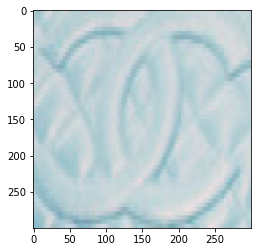

In [214]:
cha = cnn_model_1.predict(images[980:1960])
# print(adi.size) 
# print(adi)
# for i in range(adi.size):

cha = cha.tolist()

listC = list()

for c in cha:
  
  # print(len(a))
  # print(type(a))
  maxi = np.max(np.array(c))
  list1 = list()
  
  for b in c:
    if b == maxi:
      list1.append(True)
    else:
      list1.append(False)

  listC.append(list1)  

# print(listA)

cnt, cnt1 = 0, 0

# fig, axis = plt.subplots(8, 5)

def convert(a, b, c):
  x = int(a / c)
  y = int(a % c) 

  return x,y 

# for i in range(20):
#   print(convert(i, 5, 4))

for i in range(len(listC)):
  lis = listC[i]
  if(lis[1] != True):
    # x,y = convert(cnt, 8, 5)
    # axis[int(x), int(y)].imshow(images[980 + i])
    # print(980 + i)
    cnt1 += 1
    if((980+i)%14 == 0):
      cnt += 1
      print(i + 980)
      plt.imshow(images[980 + i])

print("Number of original images misclassified: " + str(cnt)) 
print("Number of total images misclassified: " + str(cnt1))

In [217]:
gucci = cnn_model_1.predict(images[1960:2940])
# print(adi.size) 
# print(adi)
# for i in range(adi.size):

g = gucci.tolist()

listG = list()

for a in g:
  
  # print(len(a))
  # print(type(a))
  maxi = np.max(np.array(a))
  list1 = list()
  
  for b in a:
    if b == maxi:
      list1.append(True)
    else:
      list1.append(False)

  listG.append(list1)  

# print(listA)

cnt, cnt1 = 0, 0

# fig, axis = plt.subplots(5, 3)

def convert(a, b, c):
  x = int(a / c)
  y = int(a % c) 

  return x,y 

# for i in range(20):
#   print(convert(i, 5, 4))

for i in range(len(listG)):
  lis = listG[i]
  if(lis[2] != True):
    # x,y = convert(cnt, 5, 3)
    # axis[int(x), int(y)].imshow(images[1960 + i])
    # print(1960 + i)
    cnt1 += 1
    if((1960 + i)%14 == 0):
      cnt += 1

print("Number of original images misclassified: " + str(cnt)) 
print("Number of total images misclassified: " + str(cnt1))

Number of original images misclassified: 0
Number of total images misclassified: 15


In [218]:
hh = cnn_model_1.predict(images[2940:3920])
# print(adi.size) 
# print(adi)
# for i in range(adi.size):

hh = hh.tolist()

listH = list()

for c in hh:
  
  # print(len(a))
  # print(type(a))
  maxi = np.max(np.array(c))
  list1 = list()
  
  for b in c:
    if b == maxi:
      list1.append(True)
    else:
      list1.append(False)

  listH.append(list1)  

# print(listA)

cnt, cnt1 = 0, 0

# fig, axis = plt.subplots(8, 5)

def convert(a, b, c):
  x = int(a / c)
  y = int(a % c) 

  return x,y 

# for i in range(20):
#   print(convert(i, 5, 4))

for i in range(len(listC)):
  lis = listH[i]
  if(lis[3] != True):
    # x,y = convert(cnt, 8, 5)
    # axis[int(x), int(y)].imshow(images[980 + i])
    # print(980 + i)
    cnt1 += 1
    if((2940 + i)%14 == 0):
      cnt += 1
      print(i + 2940)
      plt.imshow(images[2940 + i])

print("Number of original images misclassified: " + str(cnt)) 
print("Number of total images misclassified: " + str(cnt1))

Number of original images misclassified: 0
Number of total images misclassified: 10


In [219]:
lac = cnn_model_1.predict(images[3920:4900])
# print(adi.size) 
# print(adi)
# for i in range(adi.size):

lac = lac.tolist()

listL = list()

for c in lac:
  
  # print(len(a))
  # print(type(a))
  maxi = np.max(np.array(c))
  list1 = list()
  
  for b in c:
    if b == maxi:
      list1.append(True)
    else:
      list1.append(False)

  listL.append(list1)  

# print(listA)

cnt, cnt1 = 0, 0

# fig, axis = plt.subplots(8, 5)

def convert(a, b, c):
  x = int(a / c)
  y = int(a % c) 

  return x,y 

# for i in range(20):
#   print(convert(i, 5, 4))

for i in range(len(listC)):
  lis = listL[i]
  if(lis[4] != True):
    # x,y = convert(cnt, 8, 5)
    # axis[int(x), int(y)].imshow(images[980 + i])
    # print(980 + i)
    cnt1 += 1
    if((3920 + i)%14 == 0):
      cnt += 1
      print(i + 3920)
      plt.imshow(images[3920 + i])

print("Number of original images misclassified: " + str(cnt)) 
print("Number of total images misclassified: " + str(cnt1))

Number of original images misclassified: 0
Number of total images misclassified: 19


Clearly, most of the errors are on augmented images (some of which are deliberately hard with very little contrast)

Now, let's create a test set and labes using original 700 images onyl and evaluate the model...

In [210]:
img = np.zeros((700,300,300,3), dtype = 'uint8')
cnt = 0

dir = "jpg"
temp = os.path.join(str(dir))

for temp_dir_name in sorted(os.listdir(temp)):

    print(temp_dir_name)
    tmp = os.path.join(str(dir) + '/' + str(temp_dir_name))

    for image in sorted(os.listdir(tmp)):
      if image.endswith(".jpg") or image.endswith(".png"):
        im = cv2.imread(str(dir) + '/' + str(temp_dir_name) + '/' + str(image))

        box = boxes[cnt]
        box = box.reshape((1,4))
        w1 = int(box[0][0])
        h1 = int(box[0][1])
        w2 = int(box[0][2])
        h2 = int(box[0][3])

        tmpImg = np.zeros((h2 - h1, w2 - w1, 3))

        tmpImg = im[h1:h2, w1:w2, :]

        tmpImg = cv2.resize(tmpImg, (300, 300), interpolation = cv2.INTER_AREA)
        # tmpImg = tmpImg / 255.0
        # tmpImg = tmpImg.tolist()

        # im1 = np.array(tmpImg)
        img[cnt] = tmpImg
        cnt = cnt + 1

print(cnt)
assert(cnt == 700)

labels = np.zeros((700,10))
lbl = -1
for i in range(0,700):
  if i%70 == 0:
    lbl = lbl + 1
  labels[i][lbl] = 1
  

adidas0
chanel
gucci
hh
lacoste
mk
nike
prada
puma
supreme
700


In [220]:
cnn_model_1.evaluate(img, labels) #reevaluating on original imageset, we find an accuray of 99.86%, ie, only 1 misclassified image out of 700

700/700 [==============================] - 1s 840us/step


[0.018480920764684144, 0.9985714285714286]

Now, the accuracy on the original image data set has gone upto 99.86%! The only misclassified image was a Chanel image with very low contrast(very bright image)...